In [223]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score ,f1_score,classification_report, confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [130]:
df= pd.read_csv("../Dataset/Placement_Data_Full_Class.csv")

In [131]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [133]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [134]:
df = df.drop('sl_no',axis=1)

In [135]:
df.shape[0]

215

In [136]:
df.shape[1]

14

In [137]:
#Checking for the null values

df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [138]:
#Checking for the duplicated values

df.duplicated().sum()

np.int64(0)

Handling null values of salary

In [139]:
df['salary'] = df['salary'].fillna(0)

In [140]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [141]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


**Data Preprocessing**

EDA

Univariate Analysis

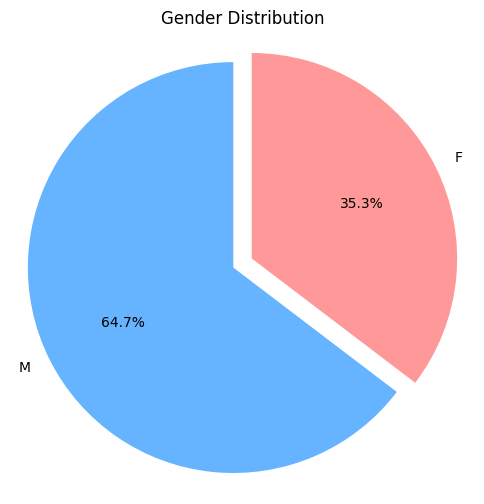

In [142]:
# Create a pie chart for gender distribution
gender_counts = df['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], explode=(0.1, 0))
plt.title("Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [143]:
gender_count = df.groupby('gender').status.value_counts()
print("No. of student placed and not placed based on gender:\n" ,gender_count)

No. of student placed and not placed based on gender:
 gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: count, dtype: int64


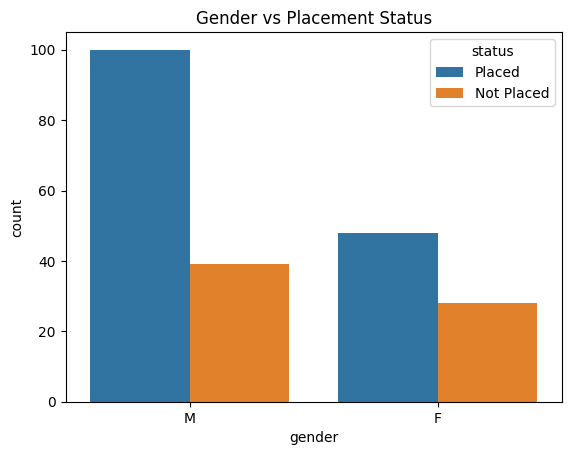

In [144]:
# Countplot for gender and placement status
sns.countplot(x='gender', hue='status', data=df)
plt.title("Gender vs Placement Status")
plt.show()

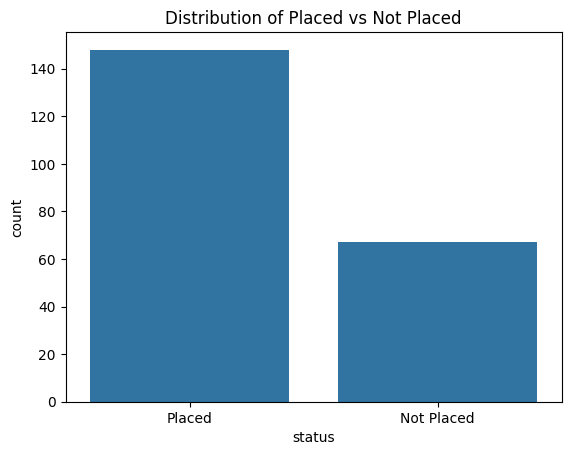

In [145]:
# Visualize the distribution of the 'status' variable

sns.countplot(x='status', data=df)
plt.title("Distribution of Placed vs Not Placed")
plt.show()

In [146]:
work_ex_count = df.groupby('workex').status.value_counts()
print("No. of student placed and not placed based on Work experience:\n" ,work_ex_count)

No. of student placed and not placed based on Work experience:
 workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: count, dtype: int64


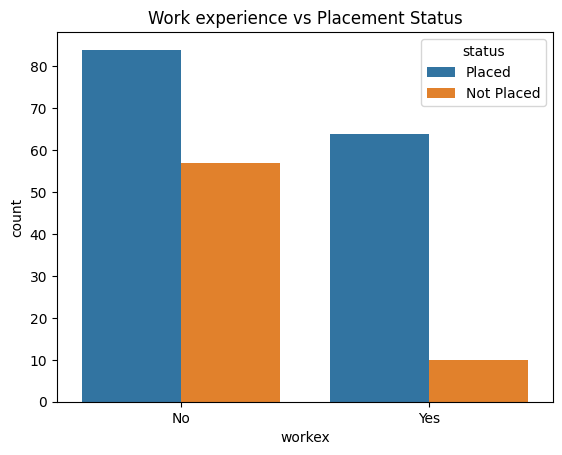

In [147]:
# Countplot for Work experience and placement status
sns.countplot(x='workex', hue='status', data=df)
plt.title("Work experience vs Placement Status")
plt.show()

In [148]:
specialization_count = df.groupby('specialisation').status.value_counts()
print("No. of student placed and not placed based on specialization:\n" ,specialization_count)

No. of student placed and not placed based on specialization:
 specialisation  status    
Mkt&Fin         Placed        95
                Not Placed    25
Mkt&HR          Placed        53
                Not Placed    42
Name: count, dtype: int64


Encoding and Transforming

In [149]:
le = LabelEncoder()

In [150]:
df['gender']= le.fit_transform(df['gender'])
df['ssc_b']= le.fit_transform(df['ssc_b'])
df['hsc_b']= le.fit_transform(df['hsc_b'])
df['hsc_s']= le.fit_transform(df['hsc_s'])
df['degree_t']= le.fit_transform(df['degree_t'])
df['workex']= le.fit_transform(df['workex'])
df['specialisation']= le.fit_transform(df['specialisation'])
df['status']= le.fit_transform(df['status'])

In [151]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [262]:
X = df.drop(['status', 'salary'], axis=1)
y = df['status']

In [263]:
#Splitting the dataset into train and test

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7)

In [174]:
'''scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

In [264]:
print(X_train.shape)
print(X_test.shape)

(150, 12)
(65, 12)


**Model Selection**

In [265]:
lr = LogisticRegression(max_iter=1000,C=1.0)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [266]:
acc_train = accuracy_score(y_train, lr.predict(X_train))
acc_test = lr.score(X_test, y_test)

print(acc_train)
print(acc_test)

0.9133333333333333
0.8307692307692308


In [267]:
y_pred_lr = lr.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred_lr)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred_lr)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred_lr)*100}\n\n\n")

Confusion Matrix is: 
 [[13  7]
 [ 4 41]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.85      0.91      0.88        45

    accuracy                           0.83        65
   macro avg       0.81      0.78      0.79        65
weighted avg       0.83      0.83      0.83        65




Accuracy Percent is: 
 83.07692307692308





In [268]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
    'penalty': ['l1', 'l2']  # Penalties
}

# Apply GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8733333333333334
Test Set Accuracy: 0.8461538461538461


In [254]:
from sklearn.model_selection import cross_val_score

# Cross-validation on logistic regression, for example
cross_val_score(lr, X, y, cv=5)

array([0.8372093 , 0.76744186, 0.93023256, 0.8372093 , 0.88372093])

In [255]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)

RandomForestClassifier()

In [256]:
y_pred_rc = rc.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred_rc)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred_rc)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred_rc)*100}\n\n\n")

Confusion Matrix is: 
 [[ 8 12]
 [ 2 43]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.80      0.40      0.53        20
           1       0.78      0.96      0.86        45

    accuracy                           0.78        65
   macro avg       0.79      0.68      0.70        65
weighted avg       0.79      0.78      0.76        65




Accuracy Percent is: 
 78.46153846153847





In [193]:
svc  = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svc.fit(X_train_scaled,y_train)

SVC(probability=True)

In [199]:
y_pred_svc = svc.predict(X_test_scaled)

In [200]:
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred_svc)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred_svc)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred_svc)*100}\n\n\n")

Confusion Matrix is: 
 [[11  9]
 [ 3 42]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.79      0.55      0.65        20
           1       0.82      0.93      0.88        45

    accuracy                           0.82        65
   macro avg       0.80      0.74      0.76        65
weighted avg       0.81      0.82      0.80        65




Accuracy Percent is: 
 81.53846153846153





In [270]:
dt=DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_predt= dt.predict(X_train)
ypred_prob=dt.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred3))


score=cross_val_score(dt, X_train,y_train,scoring='accuracy', cv=5)

bias_error=np.mean(1-score)
var_error=np.std(score)
print('Bias_error',bias_error)
print('Variance_error:',var_error)



              precision    recall  f1-score   support

           0       0.57      0.40      0.47        20
           1       0.76      0.87      0.81        45

    accuracy                           0.72        65
   macro avg       0.67      0.63      0.64        65
weighted avg       0.71      0.72      0.71        65

Bias_error 0.23333333333333334
Variance_error: 0.09428090415820636


Area under the roc : 0.6333333333333333


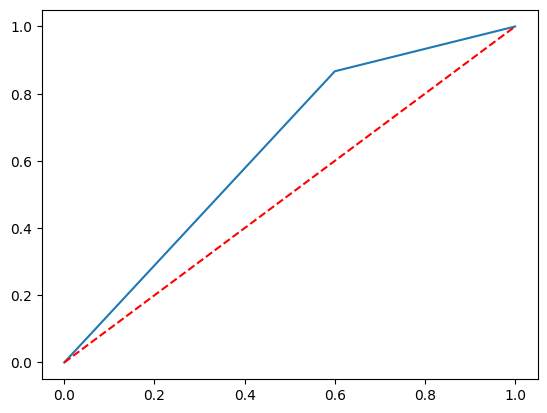

In [271]:
# ROC CURVE FOR Decision tree model

from sklearn.metrics import roc_curve,roc_auc_score

print('Area under the roc :',roc_auc_score(y_test,ypred_prob))
fpr,tpr,threshold=roc_curve(y_test,ypred_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

In [247]:
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred3)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred3)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred3)*100}\n\n\n")

Confusion Matrix is: 
 [[ 8 12]
 [ 6 39]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.57      0.40      0.47        20
           1       0.76      0.87      0.81        45

    accuracy                           0.72        65
   macro avg       0.67      0.63      0.64        65
weighted avg       0.71      0.72      0.71        65




Accuracy Percent is: 
 72.3076923076923





In [272]:
param_dist = {
    'max_depth': [3, 5, 10, 20, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required in a leaf
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
Best Score: 0.8266666666666668
Test Set Accuracy: 0.7230769230769231


In [237]:
xgb=XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=4)
xgb.fit(X_train_scaled,y_train)
y_pred7=xgb.predict(X_test_scaled)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.82      0.91      0.86        45

    accuracy                           0.80        65
   macro avg       0.78      0.73      0.75        65
weighted avg       0.79      0.80      0.79        65



In [238]:
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred7)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred7)}\n\n\n")
print(f"Accuracy Percent is: \n {accuracy_score(y_test,y_pred7)*100}\n\n\n")

Confusion Matrix is: 
 [[11  9]
 [ 4 41]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.82      0.91      0.86        45

    accuracy                           0.80        65
   macro avg       0.78      0.73      0.75        65
weighted avg       0.79      0.80      0.79        65




Accuracy Percent is: 
 80.0





In [210]:
from sklearn.model_selection import cross_val_score

# Example: Evaluate Logistic Regression with cross-validation
scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
print(f"Mean Accuracy: {scores.mean()}")


Mean Accuracy: 0.8604651162790697
